In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

 # 占比分析
1.饼图
2.圆环图
3.矩形树图 

In [2]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

c = (
    Pie()
    .add("", [list(z) for z in zip(Faker.choose(), Faker.values())])
    .set_global_opts(title_opts=opts.TitleOpts(title="Pie-基本示例"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
#     .render("pie_base.html")
)
c.render_notebook()

In [3]:
# 不同类别销售额占比分析

In [4]:
df1 = pd.read_excel('./超市.xlsx')
df1.head()

,行 ID,订单 ID,订单日期,发货日期,邮寄方式,客户 ID,客户名称,细分,城市,省/自治区,国家,地区,产品 ID,类别,子类别,产品名称,销售额,数量,折扣,利润
0,1,US-2018-1357144,2018-04-27,2018-04-29,二级,曾惠-14485,曾惠,公司,杭州,浙江,中国,华东,办公用-用品-10002717,办公用品,用品,"Fiskars 剪刀, 蓝色",129.696,2,0.4,-60.704
1,2,CN-2018-1973789,2018-06-15,2018-06-19,标准级,许安-10165,许安,消费者,内江,四川,中国,西南,办公用-信封-10004832,办公用品,信封,"GlobeWeis 搭扣信封, 红色",125.440,2,0.0,42.560
2,3,CN-2018-1973789,2018-06-15,2018-06-19,标准级,许安-10165,许安,消费者,内江,四川,中国,西南,办公用-装订-10001505,办公用品,装订机,"Cardinal 孔加固材料, 回收",31.920,2,0.4,4.200
3,4,US-2018-3017568,2018-12-09,2018-12-13,标准级,宋良-17170,宋良,公司,镇江,江苏,中国,华东,办公用-用品-10003746,办公用品,用品,"Kleencut 开信刀, 工业",321.216,4,0.4,-27.104
4,5,CN-2017-2975416,2017-05-31,2017-06-02,二级,万兰-15730,万兰,消费者,汕头,广东,中国,中南,办公用-器具-10003452,办公用品,器具,"KitchenAid 搅拌机, 黑色",1375.920,3,0.0,550.200


In [5]:
df1.columns

Index(['行 ID', '订单 ID', '订单日期', '发货日期', '邮寄方式', '客户 ID', '客户名称', '细分', '城市',
       '省/自治区', '国家', '地区', '产品 ID', '类别', '子类别', '产品名称', '销售额', '数量', '折扣',
       '利润'],
      dtype='object')

In [6]:
data1 = df1[['类别','销售额']].groupby('类别').agg({'销售额':'sum'})
data1

,销售额
类别,
办公用品,4865589.792
家具,5734340.829
技术,5469023.504


In [7]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

c = (
    Pie()
    .add("", [list(z) for z in zip(data1.index.tolist(), data1['销售额'].tolist())])
    .set_global_opts(title_opts=opts.TitleOpts(title="不同类别销售额的占比分析"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
#     .render("pie_base.html")
)
c.render_notebook()

In [8]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

c = (
    Pie()
    .add("", [list(z) for z in zip(data1.index.tolist(), data1['销售额'].tolist())])
    .set_global_opts(title_opts=opts.TitleOpts(title="不同类别销售额的占比分析"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))# 把c换成{d}%就可以换成百分比
#     .render("pie_base.html")
)
c.render_notebook()

# 圆环图

In [9]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

c = (
    Pie()
    .add("", [list(z) for z in zip(data1.index.tolist(), data1['销售额'].tolist())],radius=['35%','65%'])
    .set_global_opts(title_opts=opts.TitleOpts(title="不同类别销售额的占比分析"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))# 把c换成{d}%就可以换成百分比
#     .render("pie_base.html")
)
c.render_notebook()

In [10]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker


v = Faker.choose()
c = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(v, Faker.values())],
        radius=["30%", "75%"],
        center=["25%", "50%"],
        rosetype="radius",
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add(
        "",
        [list(z) for z in zip(v, Faker.values())],
        radius=["30%", "75%"],
        center=["75%", "50%"],
        rosetype="area",
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Pie-玫瑰图示例"))
#     .render("pie_rosetype.html")
)
c.render_notebook()

In [11]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

c = (
    Pie()
    .add("", [list(z) for z in zip(data1.index.tolist(), data1['销售额'].tolist())],radius='65%',rosetype="radius")
    .set_global_opts(title_opts=opts.TitleOpts(title="不同类别销售额的占比分析"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))# 把c换成{d}%就可以换成百分比
#     .render("pie_base.html")
)
c.render_notebook()

# 矩形树图
1.需求：不同省份销售额占比分析

In [12]:
df1.columns

Index(['行 ID', '订单 ID', '订单日期', '发货日期', '邮寄方式', '客户 ID', '客户名称', '细分', '城市',
       '省/自治区', '国家', '地区', '产品 ID', '类别', '子类别', '产品名称', '销售额', '数量', '折扣',
       '利润'],
      dtype='object')

In [13]:
data2 = df1[['省/自治区','销售额']].groupby('省/自治区').agg({'销售额':'sum'}).reset_index()
data2

,省/自治区,销售额
0,上海,582450.568
1,云南,360925.768
2,内蒙古,273453.012
3,北京,409147.200
4,吉林,640196.571
5,四川,400877.596
6,天津,549906.630
7,宁夏,58121.000
8,安徽,628965.190
9,山东,1586782.988


In [14]:
from pyecharts import options as opts
from pyecharts.charts import TreeMap

data = [
    {"value": 40, "name": "我是A"},
    {
        "value": 180,
        "name": "我是B",
        "children": [
            {
                "value": 76,
                "name": "我是B.children",
                "children": [
                    {"value": 12, "name": "我是B.children.a"},
                    {"value": 28, "name": "我是B.children.b"},
                    {"value": 20, "name": "我是B.children.c"},
                    {"value": 16, "name": "我是B.children.d"},
                ],
            }
        ],
    },
]

c = (
    TreeMap()
    .add("演示数据", data)
    .set_global_opts(title_opts=opts.TitleOpts(title="TreeMap-基本示例"))
#     .render("treemap_base.html")
)
c.render_notebook()

In [15]:
data2.columns

Index(['省/自治区', '销售额'], dtype='object')

In [16]:
tree_data = []
sample = []
for i,j in zip(data2['省/自治区'],data2['销售额']):
    sample = {'省/自治区':i,'销售额':j}
    tree_data.append(sample)
tree_data

[{'省/自治区': '上海', '销售额': 582450.568},
 {'省/自治区': '云南', '销售额': 360925.768},
 {'省/自治区': '内蒙古', '销售额': 273453.012},
 {'省/自治区': '北京', '销售额': 409147.2},
 {'省/自治区': '吉林', '销售额': 640196.571},
 {'省/自治区': '四川', '销售额': 400877.596},
 {'省/自治区': '天津', '销售额': 549906.63},
 {'省/自治区': '宁夏', '销售额': 58121.0},
 {'省/自治区': '安徽', '销售额': 628965.19},
 {'省/自治区': '山东', '销售额': 1586782.988},
 {'省/自治区': '山西', '销售额': 423878.77},
 {'省/自治区': '广东', '销售额': 1452929.513},
 {'省/自治区': '广西', '销售额': 377653.829},
 {'省/自治区': '新疆', '销售额': 70097.02},
 {'省/自治区': '江苏', '销售额': 649967.22},
 {'省/自治区': '江西', '销售额': 237328.7},
 {'省/自治区': '河北', '销售额': 790915.405},
 {'省/自治区': '河南', '销售额': 853574.799},
 {'省/自治区': '浙江', '销售额': 452108.244},
 {'省/自治区': '海南', '销售额': 169256.843},
 {'省/自治区': '湖北', '销售额': 621960.332},
 {'省/自治区': '湖南', '销售额': 723442.209},
 {'省/自治区': '甘肃', '销售额': 179270.028},
 {'省/自治区': '福建', '销售额': 546903.532},
 {'省/自治区': '西藏', '销售额': 10015.18},
 {'省/自治区': '贵州', '销售额': 108141.6},
 {'省/自治区': '辽宁', '销售额': 862569.736},
 {'省/自治区': '重庆'

In [17]:
from pyecharts import options as opts
from pyecharts.charts import TreeMap


c = (
    TreeMap()
    .add("演示数据",tree_data )
    .set_global_opts(title_opts=opts.TitleOpts(title="TreeMap-基本示例"))
#     .render("treemap_base.html")
)
c.render_notebook()

In [18]:
from pyecharts import options as opts
from pyecharts.charts import TreeMap


c = (
    TreeMap()
    .add("演示数据",tree_data )
    .set_global_opts(title_opts=opts.TitleOpts(title="TreeMap-基本示例"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {@[1]}"))# 让每个区域图显示销售额
#     .render("treemap_base.html")
)
c.render_notebook()

# 散点四象限

1.官方示例

In [19]:
import pyecharts.options as opts
from pyecharts.charts import Scatter

"""
Gallery 使用 pyecharts 1.1.0
参考地址: https://echarts.apache.org/examples/editor.html?c=scatter-simple

目前无法实现的功能:

1、暂无
"""

data = [
    [10.0, 8.04],
    [8.0, 6.95],
    [13.0, 7.58],
    [9.0, 8.81],
    [11.0, 8.33],
    [14.0, 9.96],
    [6.0, 7.24],
    [4.0, 4.26],
    [12.0, 10.84],
    [7.0, 4.82],
    [5.0, 5.68],
]
data.sort(key=lambda x: x[0])
x_data = [d[0] for d in data]
y_data = [d[1] for d in data]

c=(
    Scatter()
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="",
        y_axis=y_data,
        symbol_size=20,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_series_opts()
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(
            type_="value", splitline_opts=opts.SplitLineOpts(is_show=True)
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        tooltip_opts=opts.TooltipOpts(is_show=False),
    )
#     .render("basic_scatter_chart.html")
)
c.render_notebook()

In [20]:
from pyecharts import options as opts
from pyecharts.charts import Scatter
from pyecharts.commons.utils import JsCode
from pyecharts.faker import Faker

c = (
    Scatter()
    .add_xaxis(Faker.choose())
    .add_yaxis(
        "商家A",
        [list(z) for z in zip(Faker.values(), Faker.choose())],
        label_opts=opts.LabelOpts(
            formatter=JsCode(
                "function(params){return params.value[1] +' : '+ params.value[2];}"
            )
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Scatter-多维度数据"),
        tooltip_opts=opts.TooltipOpts(
            formatter=JsCode(
                "function (params) {return params.name + ' : ' + params.value[2];}"
            )
        ),
        visualmap_opts=opts.VisualMapOpts(
            type_="color", max_=150, min_=20, dimension=1
        ),
    )
#     .render("scatter_multi_dimension.html")
)
c.render_notebook()

In [21]:
from pyecharts import options as opts
from pyecharts.charts import Scatter
from pyecharts.commons.utils import JsCode
from pyecharts.faker import Faker

c = (
    Scatter()
    .add_xaxis(Faker.choose())
    .add_yaxis(
        "商家A",
        [list(z) for z in zip(Faker.values(), Faker.choose())],
        label_opts=opts.LabelOpts(
            formatter=JsCode(
                "function(params){return params.value[1] +' : '+ params.value[2];}"
            )
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Scatter-多维度数据"),
        tooltip_opts=opts.TooltipOpts(
            formatter=JsCode(
                "function (params) {return params.name + ' : ' + params.value[2];}"
            )
        ),
        visualmap_opts=opts.VisualMapOpts(
            type_="color", max_=150, min_=20, dimension=1
        ),
    )
#     .render("scatter_multi_dimension.html")
)

c.render_notebook()

In [22]:
df1.columns

Index(['行 ID', '订单 ID', '订单日期', '发货日期', '邮寄方式', '客户 ID', '客户名称', '细分', '城市',
       '省/自治区', '国家', '地区', '产品 ID', '类别', '子类别', '产品名称', '销售额', '数量', '折扣',
       '利润'],
      dtype='object')

In [23]:
data3 = df1[['子类别','销售额','利润']].groupby('子类别').agg({'销售额':'sum','利润':'sum'})
data3

,销售额,利润
子类别,,
书架,2307203.220,361136.860
信封,287486.080,72505.020
器具,2160183.004,199027.024
复印机,1991498.880,252897.260
收纳具,1152527.740,316843.380
标签,97077.960,23945.740
桌子,862010.429,-133405.671
椅子,2085435.968,325836.728
用具,479691.212,85167.712


In [29]:
from pyecharts import options as opts
from pyecharts.charts import Scatter
from pyecharts.commons.utils import JsCode
from pyecharts.faker import Faker

c = (
    Scatter()
    .add_xaxis(data3['销售额'])
    .add_yaxis(
        "商家A",
        [list(z) for z in zip(data3['利润'], data3.index)],
        label_opts=opts.LabelOpts(
            formatter=JsCode(
                "function(params){return params.value[1] +' : '+ params.value[2];}"
            )
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Scatter-多维度数据"),
        tooltip_opts=opts.TooltipOpts(
            formatter=JsCode(
                "function (params) {return params.name + ' : ' + params.value[2];}"
            )
        ),
        visualmap_opts=opts.VisualMapOpts(
            type_="color", max_=150, min_=20, dimension=1
        ),
    )
#     .render("scatter_multi_dimension.html")
)
c.render_notebook()

ValueError: Can't use non-native data structures as axis data to render chart

In [25]:
from pyecharts import options as opts
from pyecharts.charts import Scatter
from pyecharts.commons.utils import JsCode
from pyecharts.faker import Faker

c = (
    Scatter()
    .add_xaxis(data3['销售额'])
    .add_yaxis(
        "商家A",
        [list(z) for z in zip(data3['利润'], data3.index)],
        label_opts=opts.LabelOpts(
            formatter=JsCode(
                "function(params){return params.value[1] +' : '+ params.value[2];}"
            )
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Scatter-多维度数据"),
        tooltip_opts=opts.TooltipOpts(
            formatter=JsCode(
                "function (params) {return params.name + ' : ' + params.value[2];}"
            )
        ),
        visualmap_opts=opts.VisualMapOpts(
            type_="color", max_=150, min_=20, dimension=1
        ),
    )
#     .render("scatter_multi_dimension.html")
)
c.render_notebook()

ValueError: Can't use non-native data structures as axis data to render chart

In [ ]:
from pyecharts import options as opts
from pyecharts.charts import Scatter
from pyecharts.commons.utils import JsCode
from pyecharts.faker import Faker

c = (
    Scatter()
    .add_xaxis(data3['销售额'])
    .add_yaxis(
        "利润",
        [list(z) for z in zip(data3['利润'], data3.index)],
        label_opts=opts.LabelOpts(
            formatter=JsCode(
                "function(params){return params.value[2];}"# 对比上方代码删除此部位要删除的部位去掉数字
            )
        ),
    )
    # 通过设置.set_series_opts()来实现（均值）四象限
    .set_series_opts(
        markline_opts = opts.MarkLineOpts(data=[
            opts.MarkLineItem(value_index=0,type_="average"),
            opts.MarkLineItem(value_index=1,type_="average")
        ]),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="个子类别销售额和利润之间的关系"),
        tooltip_opts=opts.TooltipOpts(
            formatter=JsCode(
                "function (params) {return params.name + ' : ' + params.value[2];}"
            )
        ),
        visualmap_opts=opts.VisualMapOpts(
            type_="color", max_=150, min_=20, dimension=1
        ),
    )
#     .render("scatter_multi_dimension.html")
)
c.render_notebook()

# 地图

In [30]:
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.faker import Faker

c = (
    Geo()
    .add_schema(maptype="china")
    .add("geo", [list(z) for z in zip(Faker.provinces, Faker.values())])
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(), title_opts=opts.TitleOpts(title="Geo-基本示例")
    )
#     .render("geo_base.html")
)
c.render_notebook()

In [31]:
df1.columns

Index(['行 ID', '订单 ID', '订单日期', '发货日期', '邮寄方式', '客户 ID', '客户名称', '细分', '城市',
       '省/自治区', '国家', '地区', '产品 ID', '类别', '子类别', '产品名称', '销售额', '数量', '折扣',
       '利润'],
      dtype='object')

In [32]:
data4 = df1[['省/自治区','销售额']].groupby('省/自治区').agg({'销售额':'sum'})
data4

,销售额
省/自治区,
上海,582450.568
云南,360925.768
内蒙古,273453.012
北京,409147.200
吉林,640196.571
四川,400877.596
天津,549906.630
宁夏,58121.000
安徽,628965.190


# 地图

In [33]:
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.faker import Faker

c = (
    Geo()
    .add_schema(maptype="china")
    .add("geo", [list(z) for z in zip(data4.index.tolist(), data4['销售额'].tolist())])
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(), title_opts=opts.TitleOpts(title="各省的销售额分布情况")
    )
#     .render("geo_base.html")
)
c.render_notebook()

# 雷达图

In [34]:
import pyecharts.options as opts
from pyecharts.charts import Radar

"""
Gallery 使用 pyecharts 1.1.0
参考地址: https://echarts.apache.org/examples/editor.html?c=radar

目前无法实现的功能:

1、雷达图周围的图例的 textStyle 暂时无法设置背景颜色
"""
v1 = [[4300, 10000, 28000, 35000, 50000, 19000]]
v2 = [[5000, 14000, 28000, 31000, 42000, 21000]]

(
    Radar(init_opts=opts.InitOpts(bg_color="#CCCCCC"))
    .add_schema(
        schema=[
            opts.RadarIndicatorItem(name="销售（sales）", max_=6500),
            opts.RadarIndicatorItem(name="管理（Administration）", max_=16000),
            opts.RadarIndicatorItem(name="信息技术（Information Technology）", max_=30000),
            opts.RadarIndicatorItem(name="客服（Customer Support）", max_=38000),
            opts.RadarIndicatorItem(name="研发（Development）", max_=52000),
            opts.RadarIndicatorItem(name="市场（Marketing）", max_=25000),
        ],
        splitarea_opt=opts.SplitAreaOpts(
            is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
        ),
        textstyle_opts=opts.TextStyleOpts(color="#fff"),
    )
    .add(
        series_name="预算分配（Allocated Budget）",
        data=v1,
        linestyle_opts=opts.LineStyleOpts(color="#CD0000"),
    )
    .add(
        series_name="实际开销（Actual Spending）",
        data=v2,
        linestyle_opts=opts.LineStyleOpts(color="#5CACEE"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="基础雷达图"), legend_opts=opts.LegendOpts()
    )
#     .render("basic_radar_chart.html")
)
c.render_notebook()

# 雷达图

In [35]:
import pyecharts.options as opts
from pyecharts.charts import Radar

"""
Gallery 使用 pyecharts 1.1.0
参考地址: https://echarts.apache.org/examples/editor.html?c=radar

目前无法实现的功能:

1、雷达图周围的图例的 textStyle 暂时无法设置背景颜色
"""
v1 = [[4300, 10000, 28000, 35000, 50000, 19000]]
v2 = [[5000, 14000, 28000, 31000, 42000, 21000]]

c = (
    Radar(init_opts=opts.InitOpts(bg_color="#CCCCCC"))
    .add_schema(
        schema=[
            opts.RadarIndicatorItem(name="销售（sales）", max_=6500),
            opts.RadarIndicatorItem(name="管理（Administration）", max_=16000),
            opts.RadarIndicatorItem(name="信息技术（Information Technology）", max_=30000),
            opts.RadarIndicatorItem(name="客服（Customer Support）", max_=38000),
            opts.RadarIndicatorItem(name="研发（Development）", max_=52000),
            opts.RadarIndicatorItem(name="市场（Marketing）", max_=25000),
        ],
        splitarea_opt=opts.SplitAreaOpts(
            is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
        ),
        textstyle_opts=opts.TextStyleOpts(color="#fff"),
    )
    .add(
        series_name="公司",
        data=v1,
        linestyle_opts=opts.LineStyleOpts(color="#CD0000"),
    )
    .add(
        series_name="小型企业",
        data=v2,
        linestyle_opts=opts.LineStyleOpts(color="#5CACEE"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="基础雷达图"), legend_opts=opts.LegendOpts()
    )
#     .render("basic_radar_chart.html")
)
c.render_notebook()

1.

In [36]:
data5 = df1[['细分','地区','销售额']].groupby(['细分','地区']).agg({'销售额':'sum'}).unstack()
data5

销售额                                                     \
地区             东北           中南           华东           华北          西北   
细分                                                                     
公司     834842.827  1335665.324  1454715.808   804769.469  253458.184   
小型企业   522739.035   743813.007   942432.372   422100.987  103523.308   
消费者   1323985.607  2057936.762  2287358.262  1220430.561  458058.104   

                  
地区            西南  
细分                
公司    469341.684  
小型企业  156479.932  
消费者   677302.892

In [66]:
# 先用query查询到公司之后再销售额里面用loc进行对公司这一行的查询，查询之后转换成列表
data5.query("细分=='公司'")['销售额'].loc['公司',:].tolist()
x = data5.query("细分=='小型企业'")['销售额'].loc['小型企业',:].tolist()
x

[522739.035, 743813.007, 942432.372, 422100.987, 103523.308, 156479.932]

In [39]:
dong1 = data5['销售额']['东北'].max()+1000
zhong1 = data5['销售额']['中南'].max()+1000

In [40]:
import pyecharts.options as opts
from pyecharts.charts import Radar

"""
Gallery 使用 pyecharts 1.1.0
参考地址: https://echarts.apache.org/examples/editor.html?c=radar

目前无法实现的功能:

1、雷达图周围的图例的 textStyle 暂时无法设置背景颜色
"""
# 改动这里
v1 = [data5.query("细分=='公司'")['销售额'].loc['公司',:].tolist()]
v2 = [x]

c = (
    Radar(init_opts=opts.InitOpts(bg_color="#CCCCCC"))
    .add_schema(
        # 改动这里
        schema=[
        # 这里的max只是来拓展雷达图最外层的大小数值
        opts.RadarIndicatorItem(name="东北", max_=2000000),# 在这里可以将2000000替换成dong1
        opts.RadarIndicatorItem(name="中南", max_=2300000),# 这里也可以替换成zhong1
        opts.RadarIndicatorItem(name="华东", max_=2500000),
        opts.RadarIndicatorItem(name="华北", max_=1500000),
        opts.RadarIndicatorItem(name="西北", max_=500000),
        opts.RadarIndicatorItem(name="西南", max_=1000000),
        ],
        splitarea_opt=opts.SplitAreaOpts(
            is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
        ),
        textstyle_opts=opts.TextStyleOpts(color="#fff"),
    )
    .add(
        series_name="预算分配（Allocated Budget）",
        data=v1,
        linestyle_opts=opts.LineStyleOpts(color="#CD0000"),
    )
    .add(
        series_name="实际开销（Actual Spending）",
        data=v2,
        linestyle_opts=opts.LineStyleOpts(color="#5CACEE"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="基础雷达图"), legend_opts=opts.LegendOpts()
    )
#     .render("basic_radar_chart.html")
)
c.render_notebook()

# 漏斗图

In [41]:
from pyecharts import options as opts
from pyecharts.charts import Funnel
from pyecharts.faker import Faker

c = (
    Funnel()
    .add("商品", [list(z) for z in zip(Faker.choose(), Faker.values())])
    .set_global_opts(title_opts=opts.TitleOpts(title="用户行为分析"))
#     .render("funnel_base.html")Funnel-基本示例
)
c.render_notebook()

In [42]:
data6 = pd.read_excel('./漏斗.xlsx')
data6

,用户主要行为,用户数
0,DAU,700000
1,登录,500000
2,加入购物车,300000
3,生成订单,210000
4,支付,150000
5,完成交易,140000


In [43]:
data6['用户主要行为'].tolist()

['DAU', '登录', '加入购物车', '生成订单', '支付', '完成交易']

In [44]:
data6['用户数'].tolist()

[700000, 500000, 300000, 210000, 150000, 140000]

In [45]:
from pyecharts import options as opts
from pyecharts.charts import Funnel
from pyecharts.faker import Faker

c = (
    Funnel()
    .add("商品", [list(z) for z in zip(data6['用户主要行为'].tolist(), data6['用户数'].tolist())])
    .set_global_opts(title_opts=opts.TitleOpts(title="Funnel-基本示例"))
#     .render("funnel_base.html")
)
c.render_notebook()

修饰

In [46]:
from pyecharts import options as opts
from pyecharts.charts import Funnel
from pyecharts.faker import Faker

c = (
    Funnel()
    .add("商品", [list(z) for z in zip(data6['用户主要行为'].tolist(), data6['用户数'].tolist())],label_opts=opts.LabelOpts(position="inside",formatter ='{b}\n{@[1]}{d}%'),)# 在这里添加label_opts改变字的位置；添加formatter来显示数据b和@之间可以换成\n这样数字及换行了加{d}%
    .set_global_opts(title_opts=opts.TitleOpts(title="Funnel-基本示例"))
#     .render("funnel_base.html")
)
c.render_notebook()

In [47]:
# 转化率
# 1. 环节转化率：即相邻两个环节之间的转化率（相除）
# 整体转化率：最终结论除最原始的数据（完成交易/DAU）

# 象形图

In [48]:
from pyecharts import options as opts
from pyecharts.charts import PictorialBar
from pyecharts.globals import SymbolType

location = ["山西", "四川", "西藏", "北京", "上海", "内蒙古", "云南", "黑龙江", "广东", "福建"]
values = [13, 42, 67, 81, 86, 94, 166, 220, 249, 262]

c = (
    PictorialBar()
    .add_xaxis(location)
    .add_yaxis(
        "",
        values,
        label_opts=opts.LabelOpts(is_show=False),
        symbol_size=18,
        symbol_repeat="fixed",
        symbol_offset=[0, 0],
        is_symbol_clip=True,
        symbol=SymbolType.ROUND_RECT,
    )
    .reversal_axis()
    .set_global_opts(
        title_opts=opts.TitleOpts(title="PictorialBar-各省份人口数量（虚假数据）"),
        xaxis_opts=opts.AxisOpts(is_show=False),
        yaxis_opts=opts.AxisOpts(
            axistick_opts=opts.AxisTickOpts(is_show=False),
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(opacity=0)
            ),
        ),
    )
#     .render("pictorialbar_base.html")
)
c.render_notebook()

In [49]:
df1.columns

Index(['行 ID', '订单 ID', '订单日期', '发货日期', '邮寄方式', '客户 ID', '客户名称', '细分', '城市',
       '省/自治区', '国家', '地区', '产品 ID', '类别', '子类别', '产品名称', '销售额', '数量', '折扣',
       '利润'],
      dtype='object')

In [50]:
data7 = df1[['地区','销售额']].groupby('地区').agg({'销售额':'sum'})

In [51]:
data7

,销售额
地区,
东北,2681567.469
中南,4137415.093
华东,4684506.442
华北,2447301.017
西北,815039.596
西南,1303124.508


In [52]:
locations = data7.index.tolist()
locations

['东北', '中南', '华东', '华北', '西北', '西南']

In [53]:
valuse = data7['销售额'].tolist()
values

[13, 42, 67, 81, 86, 94, 166, 220, 249, 262]

In [54]:
from pyecharts import options as opts
from pyecharts.charts import PictorialBar
from pyecharts.globals import SymbolType
# location = data7.idnex.tolist()
location = locations
values = values
pathSymbols = {
  'reindeer':
    'path://M-22.788,24.521c2.08-0.986,3.611-3.905,4.984-5.892 c-2.686,2.782-5.047,5.884-9.102,7.312c-0.992,0.005-0.25-2.016,0.34-2.362l1.852-0.41c0.564-0.218,0.785-0.842,0.902-1.347 c2.133-0.727,4.91-4.129,6.031-6.194c1.748-0.7,4.443-0.679,5.734-2.293c1.176-1.468,0.393-3.992,1.215-6.557 c0.24-0.754,0.574-1.581,1.008-2.293c-0.611,0.011-1.348-0.061-1.959-0.608c-1.391-1.245-0.785-2.086-1.297-3.313 c1.684,0.744,2.5,2.584,4.426,2.586C-8.46,3.012-8.255,2.901-8.04,2.824c6.031-1.952,15.182-0.165,19.498-3.937 c1.15-3.933-1.24-9.846-1.229-9.938c0.008-0.062-1.314-0.004-1.803-0.258c-1.119-0.771-6.531-3.75-0.17-3.33 c0.314-0.045,0.943,0.259,1.439,0.435c-0.289-1.694-0.92-0.144-3.311-1.946c0,0-1.1-0.855-1.764-1.98 c-0.836-1.09-2.01-2.825-2.992-4.031c-1.523-2.476,1.367,0.709,1.816,1.108c1.768,1.704,1.844,3.281,3.232,3.983 c0.195,0.203,1.453,0.164,0.926-0.468c-0.525-0.632-1.367-1.278-1.775-2.341c-0.293-0.703-1.311-2.326-1.566-2.711 c-0.256-0.384-0.959-1.718-1.67-2.351c-1.047-1.187-0.268-0.902,0.521-0.07c0.789,0.834,1.537,1.821,1.672,2.023 c0.135,0.203,1.584,2.521,1.725,2.387c0.102-0.259-0.035-0.428-0.158-0.852c-0.125-0.423-0.912-2.032-0.961-2.083 c-0.357-0.852-0.566-1.908-0.598-3.333c0.4-2.375,0.648-2.486,0.549-0.705c0.014,1.143,0.031,2.215,0.602,3.247 c0.807,1.496,1.764,4.064,1.836,4.474c0.561,3.176,2.904,1.749,2.281-0.126c-0.068-0.446-0.109-2.014-0.287-2.862 c-0.18-0.849-0.219-1.688-0.113-3.056c0.066-1.389,0.232-2.055,0.277-2.299c0.285-1.023,0.4-1.088,0.408,0.135 c-0.059,0.399-0.131,1.687-0.125,2.655c0.064,0.642-0.043,1.768,0.172,2.486c0.654,1.928-0.027,3.496,1,3.514 c1.805-0.424,2.428-1.218,2.428-2.346c-0.086-0.704-0.121-0.843-0.031-1.193c0.221-0.568,0.359-0.67,0.312-0.076 c-0.055,0.287,0.031,0.533,0.082,0.794c0.264,1.197,0.912,0.114,1.283-0.782c0.15-0.238,0.539-2.154,0.545-2.522 c-0.023-0.617,0.285-0.645,0.309,0.01c0.064,0.422-0.248,2.646-0.205,2.334c-0.338,1.24-1.105,3.402-3.379,4.712 c-0.389,0.12-1.186,1.286-3.328,2.178c0,0,1.729,0.321,3.156,0.246c1.102-0.19,3.707-0.027,4.654,0.269 c1.752,0.494,1.531-0.053,4.084,0.164c2.26-0.4,2.154,2.391-1.496,3.68c-2.549,1.405-3.107,1.475-2.293,2.984 c3.484,7.906,2.865,13.183,2.193,16.466c2.41,0.271,5.732-0.62,7.301,0.725c0.506,0.333,0.648,1.866-0.457,2.86 c-4.105,2.745-9.283,7.022-13.904,7.662c-0.977-0.194,0.156-2.025,0.803-2.247l1.898-0.03c0.596-0.101,0.936-0.669,1.152-1.139 c3.16-0.404,5.045-3.775,8.246-4.818c-4.035-0.718-9.588,3.981-12.162,1.051c-5.043,1.423-11.449,1.84-15.895,1.111 c-3.105,2.687-7.934,4.021-12.115,5.866c-3.271,3.511-5.188,8.086-9.967,10.414c-0.986,0.119-0.48-1.974,0.066-2.385l1.795-0.618 C-22.995,25.682-22.849,25.035-22.788,24.521z',
  'plane':
    'path://M1.112,32.559l2.998,1.205l-2.882,2.268l-2.215-0.012L1.112,32.559z M37.803,23.96 c0.158-0.838,0.5-1.509,0.961-1.904c-0.096-0.037-0.205-0.071-0.344-0.071c-0.777-0.005-2.068-0.009-3.047-0.009 c-0.633,0-1.217,0.066-1.754,0.18l2.199,1.804H37.803z M39.738,23.036c-0.111,0-0.377,0.325-0.537,0.924h1.076 C40.115,23.361,39.854,23.036,39.738,23.036z M39.934,39.867c-0.166,0-0.674,0.705-0.674,1.986s0.506,1.986,0.674,1.986 s0.672-0.705,0.672-1.986S40.102,39.867,39.934,39.867z M38.963,38.889c-0.098-0.038-0.209-0.07-0.348-0.073 c-0.082,0-0.174,0-0.268-0.001l-7.127,4.671c0.879,0.821,2.42,1.417,4.348,1.417c0.979,0,2.27-0.006,3.047-0.01 c0.139,0,0.25-0.034,0.348-0.072c-0.646-0.555-1.07-1.643-1.07-2.967C37.891,40.529,38.316,39.441,38.963,38.889z M32.713,23.96 l-12.37-10.116l-4.693-0.004c0,0,4,8.222,4.827,10.121H32.713z M59.311,32.374c-0.248,2.104-5.305,3.172-8.018,3.172H39.629 l-25.325,16.61L9.607,52.16c0,0,6.687-8.479,7.95-10.207c1.17-1.6,3.019-3.699,3.027-6.407h-2.138 c-5.839,0-13.816-3.789-18.472-5.583c-2.818-1.085-2.396-4.04-0.031-4.04h0.039l-3.299-11.371h3.617c0,0,4.352,5.696,5.846,7.5 c2,2.416,4.503,3.678,8.228,3.87h30.727c2.17,0,4.311,0.417,6.252,1.046c3.49,1.175,5.863,2.7,7.199,4.027 C59.145,31.584,59.352,32.025,59.311,32.374z M22.069,30.408c0-0.815-0.661-1.475-1.469-1.475c-0.812,0-1.471,0.66-1.471,1.475 s0.658,1.475,1.471,1.475C21.408,31.883,22.069,31.224,22.069,30.408z M27.06,30.408c0-0.815-0.656-1.478-1.466-1.478 c-0.812,0-1.471,0.662-1.471,1.478s0.658,1.477,1.471,1.477C26.404,31.885,27.06,31.224,27.06,30.408z M32.055,30.408 c0-0.815-0.66-1.475-1.469-1.475c-0.808,0-1.466,0.66-1.466,1.475s0.658,1.475,1.466,1.475 C31.398,31.883,32.055,31.224,32.055,30.408z M37.049,30.408c0-0.815-0.658-1.478-1.467-1.478c-0.812,0-1.469,0.662-1.469,1.478 s0.656,1.477,1.469,1.477C36.389,31.885,37.049,31.224,37.049,30.408z M42.039,30.408c0-0.815-0.656-1.478-1.465-1.478 c-0.811,0-1.469,0.662-1.469,1.478s0.658,1.477,1.469,1.477C41.383,31.885,42.039,31.224,42.039,30.408z M55.479,30.565 c-0.701-0.436-1.568-0.896-2.627-1.347c-0.613,0.289-1.551,0.476-2.73,0.476c-1.527,0-1.639,2.263,0.164,2.316 C52.389,32.074,54.627,31.373,55.479,30.565z',
  'train':
    'path://M67.335,33.596L67.335,33.596c-0.002-1.39-1.153-3.183-3.328-4.218h-9.096v-2.07h5.371 c-4.939-2.07-11.199-4.141-14.89-4.141H19.72v12.421v5.176h38.373c4.033,0,8.457-1.035,9.142-5.176h-0.027 c0.076-0.367,0.129-0.751,0.129-1.165L67.335,33.596L67.335,33.596z M27.999,30.413h-3.105v-4.141h3.105V30.413z M35.245,30.413 h-3.104v-4.141h3.104V30.413z M42.491,30.413h-3.104v-4.141h3.104V30.413z M49.736,30.413h-3.104v-4.141h3.104V30.413z  M14.544,40.764c1.143,0,2.07-0.927,2.07-2.07V35.59V25.237c0-1.145-0.928-2.07-2.07-2.07H-9.265c-1.143,0-2.068,0.926-2.068,2.07 v10.351v3.105c0,1.144,0.926,2.07,2.068,2.07H14.544L14.544,40.764z M8.333,26.272h3.105v4.141H8.333V26.272z M1.087,26.272h3.105 v4.141H1.087V26.272z M-6.159,26.272h3.105v4.141h-3.105V26.272z M-9.265,41.798h69.352v1.035H-9.265V41.798z',
  'ship': 'path://M16.678,17.086h9.854l-2.703,5.912c5.596,2.428,11.155,5.575,16.711,8.607c3.387,1.847,6.967,3.75,10.541,5.375 v-6.16l-4.197-2.763v-5.318L33.064,12.197h-11.48L20.43,15.24h-4.533l-1.266,3.286l0.781,0.345L16.678,17.086z M49.6,31.84 l0.047,1.273L27.438,20.998l0.799-1.734L49.6,31.84z M33.031,15.1l12.889,8.82l0.027,0.769L32.551,16.1L33.031,15.1z M22.377,14.045 h9.846l-1.539,3.365l-2.287-1.498h1.371l0.721-1.352h-2.023l-0.553,1.037l-0.541-0.357h-0.34l0.359-0.684h-2.025l-0.361,0.684 h-3.473L22.377,14.045z M23.695,20.678l-0.004,0.004h0.004V20.678z M24.828,18.199h-2.031l-0.719,1.358h2.029L24.828,18.199z  M40.385,34.227c-12.85-7.009-25.729-14.667-38.971-12.527c1.26,8.809,9.08,16.201,8.213,24.328 c-0.553,4.062-3.111,0.828-3.303,7.137c15.799,0,32.379,0,48.166,0l0.066-4.195l1.477-7.23 C50.842,39.812,45.393,36.961,40.385,34.227z M13.99,35.954c-1.213,0-2.195-1.353-2.195-3.035c0-1.665,0.98-3.017,2.195-3.017 c1.219,0,2.195,1.352,2.195,3.017C16.186,34.604,15.213,35.954,13.99,35.954z M23.691,20.682h-2.02l-0.588,1.351h2.023 L23.691,20.682z M19.697,18.199l-0.721,1.358h2.025l0.727-1.358H19.697z',
  'car': 'path://M49.592,40.883c-0.053,0.354-0.139,0.697-0.268,0.963c-0.232,0.475-0.455,0.519-1.334,0.475 c-1.135-0.053-2.764,0-4.484,0.068c0,0.476,0.018,0.697,0.018,0.697c0.111,1.299,0.697,1.342,0.931,1.342h3.7 c0.326,0,0.628,0,0.861-0.154c0.301-0.196,0.43-0.772,0.543-1.78c0.017-0.146,0.025-0.336,0.033-0.56v-0.01 c0-0.068,0.008-0.154,0.008-0.25V41.58l0,0C49.6,41.348,49.6,41.09,49.592,40.883L49.592,40.883z M6.057,40.883 c0.053,0.354,0.137,0.697,0.268,0.963c0.23,0.475,0.455,0.519,1.334,0.475c1.137-0.053,2.762,0,4.484,0.068 c0,0.476-0.018,0.697-0.018,0.697c-0.111,1.299-0.697,1.342-0.93,1.342h-3.7c-0.328,0-0.602,0-0.861-0.154 c-0.309-0.18-0.43-0.772-0.541-1.78c-0.018-0.146-0.027-0.336-0.035-0.56v-0.01c0-0.068-0.008-0.154-0.008-0.25V41.58l0,0 C6.057,41.348,6.057,41.09,6.057,40.883L6.057,40.883z M49.867,32.766c0-2.642-0.344-5.224-0.482-5.507 c-0.104-0.207-0.766-0.749-2.271-1.773c-1.522-1.042-1.487-0.887-1.766-1.566c0.25-0.078,0.492-0.224,0.639-0.241 c0.326-0.034,0.345,0.274,1.023,0.274c0.68,0,2.152-0.18,2.453-0.48c0.301-0.303,0.396-0.405,0.396-0.672 c0-0.268-0.156-0.818-0.447-1.146c-0.293-0.327-1.541-0.49-2.273-0.585c-0.729-0.095-0.834,0-1.022,0.121 c-0.304,0.189-0.32,1.919-0.32,1.919l-0.713,0.018c-0.465-1.146-1.11-3.452-2.117-5.269c-1.103-1.979-2.256-2.599-2.737-2.754 c-0.474-0.146-0.904-0.249-4.131-0.576c-3.298-0.344-5.922-0.388-8.262-0.388c-2.342,0-4.967,0.052-8.264,0.388 c-3.229,0.336-3.66,0.43-4.133,0.576s-1.633,0.775-2.736,2.754c-1.006,1.816-1.652,4.123-2.117,5.269L9.87,23.109 c0,0-0.008-1.729-0.318-1.919c-0.189-0.121-0.293-0.225-1.023-0.121c-0.732,0.104-1.98,0.258-2.273,0.585 c-0.293,0.327-0.447,0.878-0.447,1.146c0,0.267,0.094,0.379,0.396,0.672c0.301,0.301,1.773,0.48,2.453,0.48 c0.68,0,0.697-0.309,1.023-0.274c0.146,0.018,0.396,0.163,0.637,0.241c-0.283,0.68-0.24,0.524-1.764,1.566 c-1.506,1.033-2.178,1.566-2.271,1.773c-0.139,0.283-0.482,2.865-0.482,5.508s0.189,5.02,0.189,5.86c0,0.354,0,0.976,0.076,1.565 c0.053,0.354,0.129,0.697,0.268,0.966c0.232,0.473,0.447,0.516,1.334,0.473c1.137-0.051,2.779,0,4.477,0.07 c1.135,0.043,2.297,0.086,3.33,0.11c2.582,0.051,1.826-0.379,2.928-0.36c1.102,0.016,5.447,0.196,9.424,0.196 c3.976,0,8.332-0.182,9.423-0.196c1.102-0.019,0.346,0.411,2.926,0.36c1.033-0.018,2.195-0.067,3.332-0.11 c1.695-0.062,3.348-0.121,4.477-0.07c0.886,0.043,1.103,0,1.332-0.473c0.132-0.269,0.218-0.611,0.269-0.966 c0.086-0.592,0.078-1.213,0.078-1.565C49.678,37.793,49.867,35.408,49.867,32.766L49.867,32.766z M13.219,19.735 c0.412-0.964,1.652-2.9,2.256-3.244c0.145-0.087,1.426-0.491,4.637-0.706c2.953-0.198,6.217-0.276,7.73-0.276 c1.513,0,4.777,0.078,7.729,0.276c3.201,0.215,4.502,0.611,4.639,0.706c0.775,0.533,1.842,2.28,2.256,3.244 c0.412,0.965,0.965,2.858,0.861,3.116c-0.104,0.258,0.104,0.388-1.291,0.275c-1.387-0.103-10.088-0.216-14.185-0.216 c-4.088,0-12.789,0.113-14.184,0.216c-1.395,0.104-1.188-0.018-1.291-0.275C12.254,22.593,12.805,20.708,13.219,19.735 L13.219,19.735z M16.385,30.511c-0.619,0.155-0.988,0.491-1.764,0.482c-0.775,0-2.867-0.353-3.314-0.371 c-0.447-0.017-0.842,0.302-1.076,0.362c-0.23,0.06-0.688-0.104-1.377-0.318c-0.688-0.216-1.092-0.155-1.316-1.094 c-0.232-0.93,0-2.264,0-2.264c1.488-0.068,2.928,0.069,5.621,0.826c2.693,0.758,4.191,2.213,4.191,2.213 S17.004,30.357,16.385,30.511L16.385,30.511z M36.629,37.293c-1.23,0.164-6.386,0.207-8.794,0.207c-2.412,0-7.566-0.051-8.799-0.207 c-1.256-0.164-2.891-1.67-1.764-2.865c1.523-1.627,1.24-1.576,4.701-2.023C24.967,32.018,27.239,32,27.834,32 c0.584,0,2.865,0.025,5.859,0.404c3.461,0.447,3.178,0.396,4.699,2.022C39.521,35.623,37.887,37.129,36.629,37.293L36.629,37.293z  M48.129,29.582c-0.232,0.93-0.629,0.878-1.318,1.093c-0.688,0.216-1.145,0.371-1.377,0.319c-0.231-0.053-0.627-0.371-1.074-0.361 c-0.448,0.018-2.539,0.37-3.313,0.37c-0.772,0-1.146-0.328-1.764-0.481c-0.621-0.154-0.966-0.154-0.966-0.154 s1.49-1.464,4.191-2.213c2.693-0.758,4.131-0.895,5.621-0.826C48.129,27.309,48.361,28.643,48.129,29.582L48.129,29.582z',
# 字节可以添加SVG的图片格式M开头z结尾
'wuxing':'path://m412.43248,197.316125l74.483903,0l23.016099,-56.531129l23.016112,56.531129l74.48389,0l-60.258633,34.937759l23.01729,56.531129l-60.258659,-34.938711l-60.258646,34.938711l23.017297,-56.531129l-60.258653,-34.937759z'
}
c = (
    PictorialBar()
    .add_xaxis(location)
    .add_yaxis(
        "",
        values,
        label_opts=opts.LabelOpts(is_show=False),
        symbol_size=30,
        symbol_repeat="fixed",
        symbol_offset=[0, 0],
        is_symbol_clip=True,
#         symbol=SymbolType.ROUND_RECT,
#         symbol=pathSymbols["ship"], # 做不同的形状就是通过上面的SVG格式图片
#         symbol= 'image://帽子.png',# 自己也可以添加图片
        symbol=pathSymbols["wuxing"],
    )
    .reversal_axis()
    .set_global_opts(
        title_opts=opts.TitleOpts(title="不同地区销售额对比"),
        xaxis_opts=opts.AxisOpts(is_show=False),
        yaxis_opts=opts.AxisOpts(
            axistick_opts=opts.AxisTickOpts(is_show=False),
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(opacity=0)
            ),
        ),
    )
#     .render("pictorialbar_base.html")
)
c.render_notebook()

# 词云图

In [55]:
import pyecharts.options as opts
from pyecharts.charts import WordCloud

"""
Gallery 使用 pyecharts 1.1.0
参考地址: https://gallery.echartsjs.com/editor.html?c=xS1jMxuOVm

目前无法实现的功能:

1、暂无
"""

data = [
    ("生活资源", "999"),
    ("供热管理", "888"),
    ("供气质量", "777"),
    ("生活用水管理", "688"),
    ("一次供水问题", "588"),
    ("交通运输", "516"),
    ("城市交通", "515"),
    ("环境保护", "483"),
    ("房地产管理", "462"),
    ("城乡建设", "449"),
    ("社会保障与福利", "429"),
    ("社会保障", "407"),
    ("文体与教育管理", "406"),
    ("公共安全", "406"),
    ("公交运输管理", "386"),
    ("出租车运营管理", "385"),
    ("供热管理", "375"),
    ("市容环卫", "355"),
    ("自然资源管理", "355"),
    ("粉尘污染", "335"),
    ("噪声污染", "324"),
    ("土地资源管理", "304"),
    ("物业服务与管理", "304"),
    ("医疗卫生", "284"),
    ("粉煤灰污染", "284"),
    ("占道", "284"),
    ("供热发展", "254"),
    ("农村土地规划管理", "254"),
    ("生活噪音", "253"),
    ("供热单位影响", "253"),
    ("城市供电", "223"),
    ("房屋质量与安全", "223"),
    ("大气污染", "223"),
    ("房屋安全", "223"),
    ("文化活动", "223"),
    ("拆迁管理", "223"),
    ("公共设施", "223"),
    ("供气质量", "223"),
    ("供电管理", "223"),
    ("燃气管理", "152"),
    ("教育管理", "152"),
    ("医疗纠纷", "152"),
    ("执法监督", "152"),
    ("设备安全", "152"),
    ("政务建设", "152"),
    ("县区、开发区", "152"),
    ("宏观经济", "152"),
    ("教育管理", "112"),
    ("社会保障", "112"),
    ("生活用水管理", "112"),
    ("物业服务与管理", "112"),
    ("分类列表", "112"),
    ("农业生产", "112"),
    ("二次供水问题", "112"),
    ("城市公共设施", "92"),
    ("拆迁政策咨询", "92"),
    ("物业服务", "92"),
    ("物业管理", "92"),
    ("社会保障保险管理", "92"),
    ("低保管理", "92"),
    ("文娱市场管理", "72"),
    ("城市交通秩序管理", "72"),
    ("执法争议", "72"),
    ("商业烟尘污染", "72"),
    ("占道堆放", "71"),
    ("地上设施", "71"),
    ("水质", "71"),
    ("无水", "71"),
    ("供热单位影响", "71"),
    ("人行道管理", "71"),
    ("主网原因", "71"),
    ("集中供热", "71"),
    ("客运管理", "71"),
    ("国有公交（大巴）管理", "71"),
    ("工业粉尘污染", "71"),
    ("治安案件", "71"),
    ("压力容器安全", "71"),
    ("身份证管理", "71"),
    ("群众健身", "41"),
    ("工业排放污染", "41"),
    ("破坏森林资源", "41"),
    ("市场收费", "41"),
    ("生产资金", "41"),
    ("生产噪声", "41"),
    ("农村低保", "41"),
    ("劳动争议", "41"),
    ("劳动合同争议", "41"),
    ("劳动报酬与福利", "41"),
    ("医疗事故", "21"),
    ("停供", "21"),
    ("基础教育", "21"),
    ("职业教育", "21"),
    ("物业资质管理", "21"),
    ("拆迁补偿", "21"),
    ("设施维护", "21"),
    ("市场外溢", "11"),
    ("占道经营", "11"),
    ("树木管理", "11"),
    ("农村基础设施", "11"),
    ("无水", "11"),
    ("供气质量", "11"),
    ("停气", "11"),
    ("市政府工作部门（含部门管理机构、直属单位）", "11"),
    ("燃气管理", "11"),
    ("市容环卫", "11"),
    ("新闻传媒", "11"),
    ("人才招聘", "11"),
    ("市场环境", "11"),
    ("行政事业收费", "11"),
    ("食品安全与卫生", "11"),
    ("城市交通", "11"),
    ("房地产开发", "11"),
    ("房屋配套问题", "11"),
    ("物业服务", "11"),
    ("物业管理", "11"),
    ("占道", "11"),
    ("园林绿化", "11"),
    ("户籍管理及身份证", "11"),
    ("公交运输管理", "11"),
    ("公路（水路）交通", "11"),
    ("房屋与图纸不符", "11"),
    ("有线电视", "11"),
    ("社会治安", "11"),
    ("林业资源", "11"),
    ("其他行政事业收费", "11"),
    ("经营性收费", "11"),
    ("食品安全与卫生", "11"),
    ("体育活动", "11"),
    ("有线电视安装及调试维护", "11"),
    ("低保管理", "11"),
    ("劳动争议", "11"),
    ("社会福利及事务", "11"),
    ("一次供水问题", "11"),
]


c = (
    WordCloud()
    .add(series_name="热点分析", data_pair=data, word_size_range=[6, 66])
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="热点分析", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
#     .render("basic_wordcloud.html")
)
c.render_notebook()

In [57]:
data8 = df1[['省/自治区','销售额']].groupby('省/自治区').agg({'销售额':'sum'})
data8

,销售额
省/自治区,
上海,582450.568
云南,360925.768
内蒙古,273453.012
北京,409147.200
吉林,640196.571
四川,400877.596
天津,549906.630
宁夏,58121.000
安徽,628965.190


In [58]:
x_data = data8.index.tolist()
y_data = data8['销售额'].tolist()
data = []
for i in range(len(x_data)):
    data.append((x_data[i],int(y_data[i])))
data

[('上海', 582450),
 ('云南', 360925),
 ('内蒙古', 273453),
 ('北京', 409147),
 ('吉林', 640196),
 ('四川', 400877),
 ('天津', 549906),
 ('宁夏', 58121),
 ('安徽', 628965),
 ('山东', 1586782),
 ('山西', 423878),
 ('广东', 1452929),
 ('广西', 377653),
 ('新疆', 70097),
 ('江苏', 649967),
 ('江西', 237328),
 ('河北', 790915),
 ('河南', 853574),
 ('浙江', 452108),
 ('海南', 169256),
 ('湖北', 621960),
 ('湖南', 723442),
 ('甘肃', 179270),
 ('福建', 546903),
 ('西藏', 10015),
 ('贵州', 108141),
 ('辽宁', 862569),
 ('重庆', 361761),
 ('陕西', 457688),
 ('青海', 49863),
 ('黑龙江', 1178801)]

In [59]:
import pyecharts.options as opts
from pyecharts.charts import WordCloud

"""
Gallery 使用 pyecharts 1.1.0
参考地址: https://gallery.echartsjs.com/editor.html?c=xS1jMxuOVm

目前无法实现的功能:

1、暂无
"""

c = (
    WordCloud()
    .add(series_name="热点分析", data_pair=data, word_size_range=[6, 66])
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="热点分析", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
#     .render("basic_wordcloud.html")
)
c.render_notebook()

1.修改形状

In [60]:
import pyecharts.options as opts
from pyecharts.charts import WordCloud

"""
Gallery 使用 pyecharts 1.1.0
参考地址: https://gallery.echartsjs.com/editor.html?c=xS1jMxuOVm

目前无法实现的功能:

1、暂无
"""

c = (
    WordCloud()
    .add(series_name="热点分析", data_pair=data, word_size_range=[6, 66],shape = SymbolType.TRIANGLE)# 通过shape来改变形状
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="热点分析", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
#     .render("basic_wordcloud.html")
)
c.render_notebook()


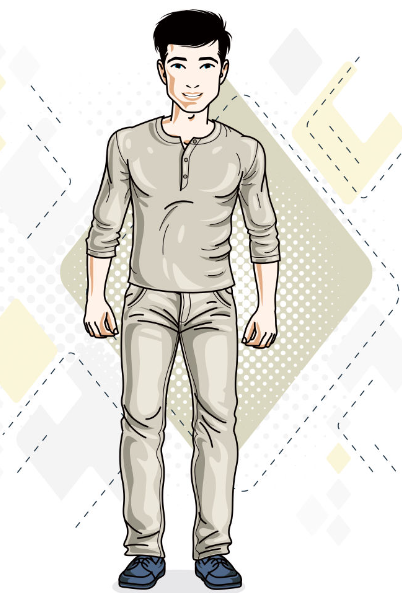

In [61]:
import pyecharts.options as opts
from pyecharts.charts import WordCloud

"""
Gallery 使用 pyecharts 1.1.0
参考地址: https://gallery.echartsjs.com/editor.html?c=xS1jMxuOVm

目前无法实现的功能:

1、暂无
"""

c = (
    WordCloud()
    .add(series_name="热点分析", data_pair=data, word_size_range=[6, 66],mask_image='shuai.png')# 通过mask_image='地址and图片名'来改变形状
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="热点分析", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
#     .render("basic_wordcloud.html")
)
c.render_notebook()


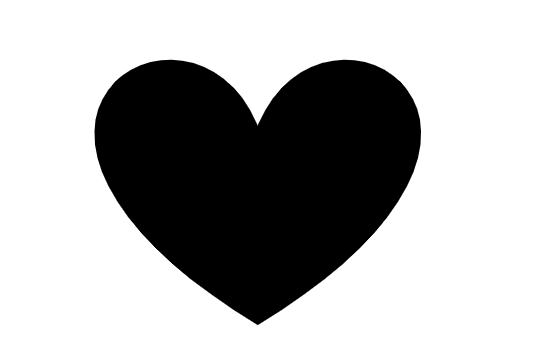

In [62]:
import pyecharts.options as opts
from pyecharts.charts import WordCloud

"""
Gallery 使用 pyecharts 1.1.0
参考地址: https://gallery.echartsjs.com/editor.html?c=xS1jMxuOVm

目前无法实现的功能:

1、暂无
"""

c = (
    WordCloud()
    .add(series_name="热点分析", data_pair=data, word_size_range=[6, 66],mask_image='xin.png')# 通过添加图片改变形状
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="热点分析", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
#     .render("basic_wordcloud.html")
)
c.render_notebook()

# 主题

In [63]:
# 导⼊模块 
import pyecharts.options as opts 
from pyecharts.charts import Line 
from pyecharts.faker import Faker 
from pyecharts.globals import ThemeType # 导入主题模块

c = (
    Line(init_opts=opts.InitOpts(theme = ThemeType.DARK)) # 创建折线图对象 
    .add_xaxis(Faker.choose()) # 添加X轴数据 
    .add_yaxis("商家A", Faker.values()) # 添加Y轴数据 
    .add_yaxis("商家B", Faker.values()) # 添加Y轴数据 
    .set_global_opts(title_opts = opts.TitleOpts(title="Line-基本⽰例")) # 设置折线图标题 
)

# c.render("line_base.html") # 将渲染之后的图表保存到HTML⽹⻚中
c.render_notebook()

# 多图表联通

In [64]:
from pyecharts import options as opts
from pyecharts.charts import Grid, Line, Bar,Scatter
bar = (
    Bar(init_opts=opts.InitOpts(theme = ThemeType.WESTEROS))
    .add_xaxis(['1日', '2日','3日','4日','5日','6日','7日'])
    .add_yaxis("小米", [244, 418,188,211,398,218,284])
    .add_yaxis("华为", [1249,312, 98,1234, 1020,823,593])
    .set_global_opts(
        title_opts=opts.TitleOpts(title="条形图",pos_left="55%"),
        legend_opts=opts.LegendOpts(pos_left="65%")
    )
)
line = (
    Line()
    .add_xaxis(['1月', '2月', '3月', '4月', '5月', '6月'])
    .add_yaxis("A店", [461, 787, 640, 893, 356, 986, 730])
    .add_yaxis("B店", [257, 494, 111, 894, 544, 296, 594])
    .set_global_opts(
        title_opts=opts.TitleOpts(title="折线图", pos_right="55%"),
        legend_opts=opts.LegendOpts(pos_right="65%"),
    )
)
# 通过grid进行调整
grid = (
    # Grid可以设置画布大小
    Grid()
    .add(bar, grid_opts=opts.GridOpts(pos_left="55%",pos_top='50%'))
    .add(line, grid_opts=opts.GridOpts(pos_right="55%",pos_bottom = '50%'))
)
grid.render_notebook()

# 百度地图

In [65]:
from pyecharts import options as opts
from pyecharts.charts import BMap
from pyecharts.faker import Faker

c = (
    BMap()
    .add_schema(baidu_ak="53oVIOgmSIejwV7EfphPgTynOZbIiVYu", center=[120.13066322374, 30.240018034923])# baidu_ak后面需要输入正确的密钥
    .add(
        "bmap",
        [list(z) for z in zip(Faker.provinces, Faker.values())],
        label_opts=opts.LabelOpts(formatter="{b}"),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="BMap-基本示例"))
#     .render("bmap_base.html")
)
c.render_notebook()